## By Ritik Pramod Chawre
## Intern at GRIP: The Sparks Foundation

## Domain : Computer Vision & Internet of Things.
## Task 1 : Object Detection / Optical Character Recognisation (ORC).
## Level : Beginner.

##### Notebook:-
##### a. Importing libraries such as cv2 and matplotlb.
##### b. Read pretrained models from OpenCV Repository.
##### c. Read data set from coco dataset which is already downloaded.
##### d. Imported Image labled as "Bike.jpg" from machine.
##### e. Displaying the detected box for an image and class name for the same.

#### Importing necessary packages

In [44]:
import cv2
import matplotlib.pylab as plt

#### Reading pretrained models from pc.

In [45]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"
dnn_model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [46]:
#Setting the confidence threshold
thresh = 0.5

#### Reading classes data set from coco file which is already downloaded.


In [47]:
Names = []
classes = "coco.names.txt"
with open(classes,"rt") as p:
    Names = p.read().rstrip('\n').split(('\n'))

In [48]:
dnn_model.setInputSize(320,320)                         # Size of input model as in config model its 320*320.
dnn_model.setInputScale(1.0 / 127.5)                    # Value of white color is 255, so gray = 127.5
dnn_model.setInputMean((127.5,127.5,127.5))             # Setting mean of every color in BGR (0-255).
dnn_model.setInputSwapRB(True)                          # As for normal images its RGB and we want BGR hence swap.

<dnn_Model 000001B37C1D7E90>

In [49]:
#importing the image to be detected
img = cv2.imread('Bike.jpg')

# Classifying the image with a box.
classIndex, confidence, bbox = dnn_model.detect(img, confThreshold=thresh)

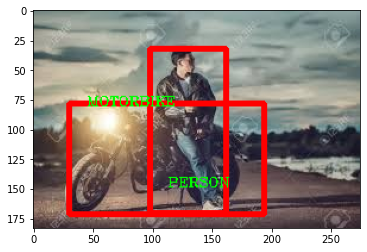

In [50]:
# Formatting the box and display with image.
font = cv2.FONT_HERSHEY_COMPLEX

for classInd, conf, box in zip(classIndex.flatten(), confidence.flatten(),bbox) :
    cv2.rectangle(img,box,(0,0,255),3)
    cv2.putText(img, Names[classInd-1].upper(),(box[0]+15, box[0]+50),font,0.4,(0,255,0),1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))